# K-means Clustering
K-mean clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity.

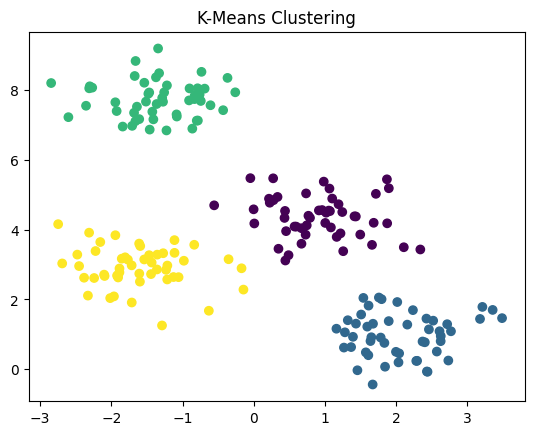

In [20]:
#import libraries
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#generate data
X, y = make_blobs(n_samples=200, centers=4, cluster_std=0.6, random_state=0)

# initiate a KMeans object with the number of cluster
kmeans = KMeans(n_clusters=4)

# fit the data
kmeans.fit(X)

# get the cluster labels
labels = kmeans.labels_

# plot the data points with different colors for different clusters
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title('K-Means Clustering')
plt.show()

## Clustering on Diamonds Dataset

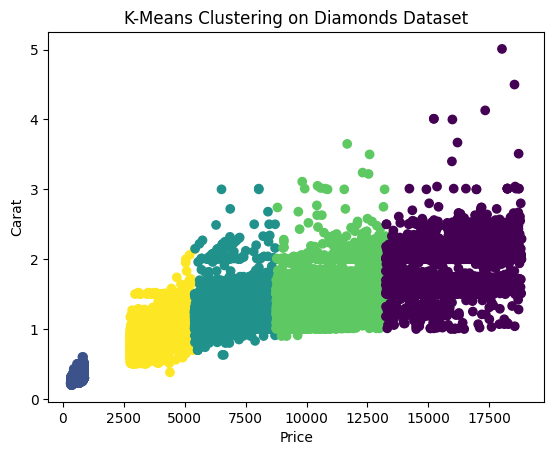

In [42]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

#load data
data= sns.load_dataset('diamonds')

#impute price with mean
data['price'].fillna(data['price'].median(), inplace=True)

#select columns for clustering
X = data[['price', 'carat']]

#initiate a KMeans object with the number of cluster
kmeans = KMeans(n_clusters=5)

#fit the data
kmeans.fit(X)

# Get the predicted cluster labels for each data point
labels = kmeans.labels_

# Add predicted cluster labels as a new column to the original dataset
data['labels'] = labels

# Plot the data points with different colors for different clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
plt.xlabel("Price")
plt.ylabel("Carat")
plt.title('K-Means Clustering on Diamonds Dataset')
plt.show()

<Axes: xlabel='labels', ylabel='price'>

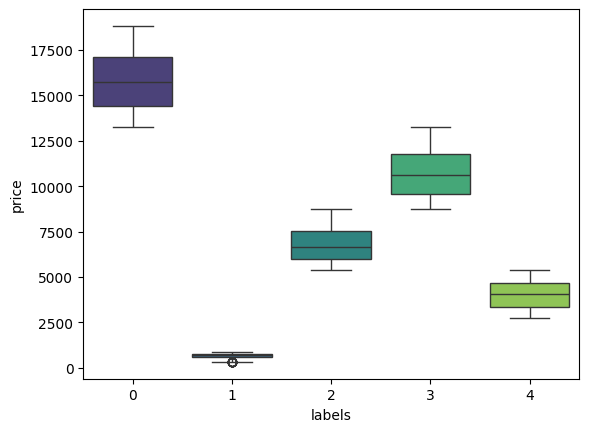

In [43]:
sns.boxplot(x='labels', y='price', data=data, palette='viridis')

In [36]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,labels
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,3
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,3
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,3
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,3
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,3


In [37]:
data.labels.unique()

array([3, 1, 2, 4, 0])

## 

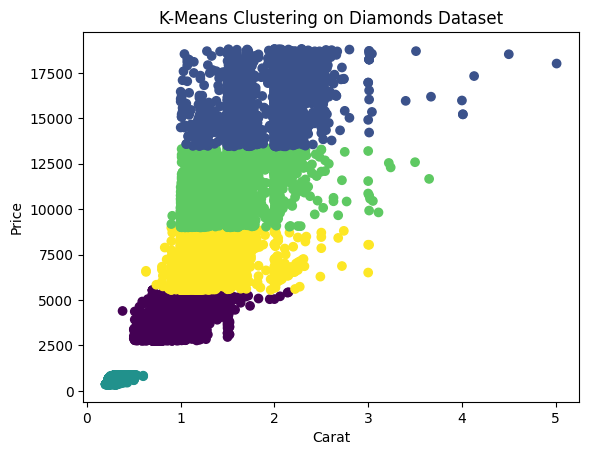

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

diamonds = sns.load_dataset('diamonds')

# Select relevant columns
X = diamonds[["carat", "price", "cut", "color", "clarity"]]

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Impute missing values with the median
X.fillna(X.median(), inplace=True)

# Instantiate a KMeans object with the number of clusters
kmeans = KMeans(n_clusters=5)

# Fit the data to the KMeans algorithm
kmeans.fit(X)

# Get the predicted cluster labels for each data point
labels = kmeans.labels_

# Add predicted cluster labels as a new column to the original dataset
diamonds['labels'] = labels

# Plot the data points with different colors for different clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title('K-Means Clustering on Diamonds Dataset')
plt.show()

## Model Evaluation

### 1. Elbow Method

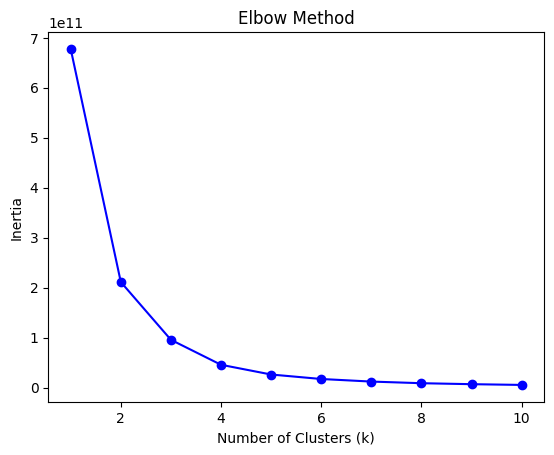

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the Diamonds dataset
df = sns.load_dataset('diamonds')

# Impute missing values of  depth with the median
df['depth'].fillna(df['depth'].median(), inplace=True)
df['price'].fillna(df['price'].median(), inplace=True)

# Select relevant features for clustering
features = ['carat', 'depth', 'price']


# Extract the selected features from the dataset
X = df[features]

# Perform K-means clustering for different values of k
k_values = range(1, 11)  # Test k from 1 to 10
inertias = []  # List to store the inertia values

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

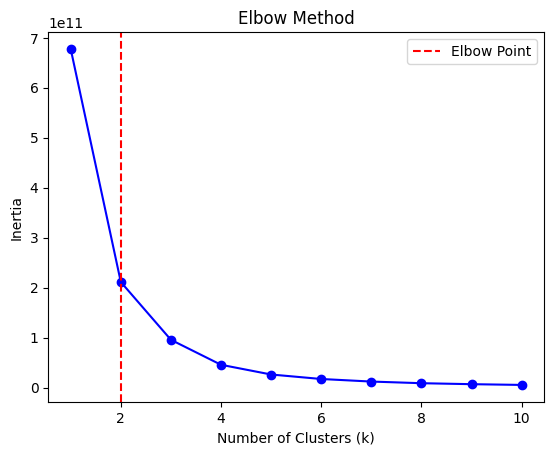

The best number of clusters based on the Elbow Method is: 2


In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the Diamonds dataset
df = sns.load_dataset('diamonds')

# Impute missing values of  depth with the median
df['depth'].fillna(df['depth'].median(), inplace=True)
df['price'].fillna(df['price'].median(), inplace=True)

# Select relevant features for clustering
features = ['carat', 'depth', 'price']

# Extract the selected features from the dataset
X = df[features]

# Perform K-means clustering for different values of k
k_values = range(1, 11)  # Test k from 1 to 10
inertias = []  # List to store the inertia values

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Find the elbow point
diff = [inertias[i] - inertias[i+1] for i in range(len(inertias)-1)]
best_k = diff.index(max(diff)) + 2

# Add a vertical line to indicate the elbow point
plt.axvline(x=best_k, color='r', linestyle='--', label='Elbow Point')

plt.legend()
plt.show()

print("The best number of clusters based on the Elbow Method is:", best_k)

### 2. Silouette Method

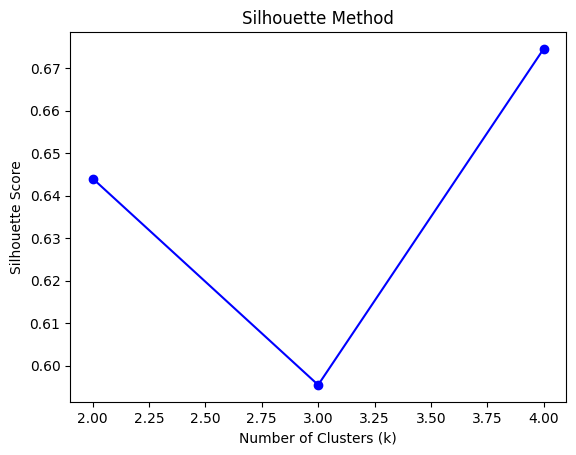

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the Diamonds dataset
df = sns.load_dataset('diamonds')

# Impute missing values of  depth with the median
df['depth'].fillna(df['depth'].median(), inplace=True)
df['price'].fillna(df['price'].median(), inplace=True)

# Select relevant features for clustering
features = ['carat', 'depth', 'price']

# Extract the selected features from the dataset
X = df[features]

# Perform K-means clustering for different values of k
k_values = range(2, 5)  # Test k from 2 to 5
silhouette_scores = []  # List to store the silhouette scores

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

# Plot the Silhouette scores
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

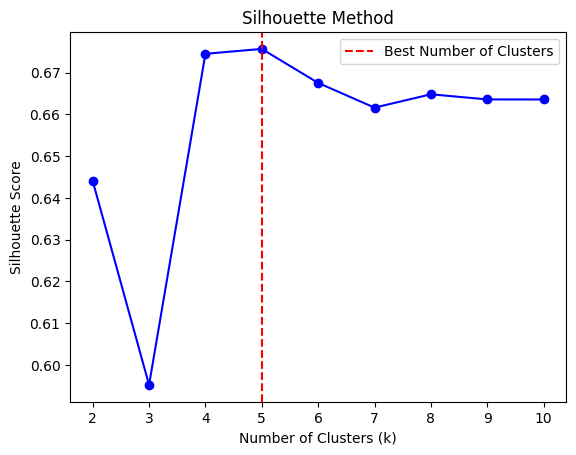

The best number of clusters based on the Silhouette Method is: 5


In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the Diamonds dataset
df = sns.load_dataset('diamonds')

# Impute missing values of  depth with the median
df['depth'].fillna(df['depth'].median(), inplace=True)
df['price'].fillna(df['price'].median(), inplace=True)

# Select relevant features for clustering
features = ['carat', 'depth', 'price']

# Extract the selected features from the dataset
X = df[features]

# Perform K-means clustering for different values of k
k_values = range(2, 11)  # Test k from 2 to 10
silhouette_scores = []  # List to store the silhouette scores

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

# Plot the Silhouette scores
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
# Find the best number of clusters based on the Silhouette Method
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]

# Add a vertical line to indicate the best number of clusters
plt.axvline(x=best_k, color='r', linestyle='--', label='Best Number of Clusters')

plt.legend()
plt.show()

print("The best number of clusters based on the Silhouette Method is:", best_k)